In [1]:
import pandas as pd
titanic = pd.read_csv("data/titanic.csv")
titanic["age"]=titanic["age"].replace(["?"], [None]).astype(float)
titanic["fare"]=titanic["fare"].replace(["?"], [None]).astype(float)
titanic

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,?,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,?,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,?,135,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,?,C,?,328,?
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,?,C,?,?,?
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,?,C,?,304,?
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,?,C,?,?,?


In [7]:
titanic["age"]

def years_to_days(yrs):
    return yrs*365

titanic["age"].apply(years_to_days)


0       10585.0000
1         334.5955
2         730.0000
3       10950.0000
4        9125.0000
           ...    
1304     5292.5000
1305           NaN
1306     9672.5000
1307     9855.0000
1308    10585.0000
Name: age, Length: 1309, dtype: float64

In [14]:
def age_group(age):
    if age < 2:
        return "toddler"
    elif age <12:
        return "child"
    elif age< 18:
        return "teen"
    elif age<50:
        return "adult"
    else:
        return "senior"

age_group(0)

'toddler'

In [15]:
titanic["age"].apply(age_group)

0         adult
1       toddler
2         child
3         adult
4         adult
         ...   
1304       teen
1305     senior
1306      adult
1307      adult
1308      adult
Name: age, Length: 1309, dtype: object

In [20]:
titanic["fare"].apply(lambda x: f"${x * 24}")

0                   $5072.1
1       $3637.2000000000003
2       $3637.2000000000003
3       $3637.2000000000003
4       $3637.2000000000003
               ...         
1304              $346.9008
1305              $346.9008
1306    $173.39999999999998
1307    $173.39999999999998
1308                 $189.0
Name: fare, Length: 1309, dtype: object

In [23]:
def currency_dollars(num , multiplier):
    return f"${num * multiplier}"
    
currency_dollars(1,20)

'$20'

In [28]:
df = titanic[["survived","age","fare"]]

In [29]:
def get_range(s):
    print ("HI")
    return s

df.apply(get_range)

HI
HI
HI


,survived,age,fare
0,1,29.0000,211.3375
1,1,0.9167,151.5500
2,0,2.0000,151.5500
3,0,30.0000,151.5500
4,0,25.0000,151.5500
...,...,...,...
1304,0,14.5000,14.4542
1305,0,NaN,14.4542
1306,0,26.5000,7.2250
1307,0,27.0000,7.2250


In [36]:
def get_fam_size(s):
    fam_size = s.sibsp + s.parch
    if fam_size == 0:
      return "solo"
    elif fam_size < 5:
      return "average"
    else:
      return "large"

<Axes: >

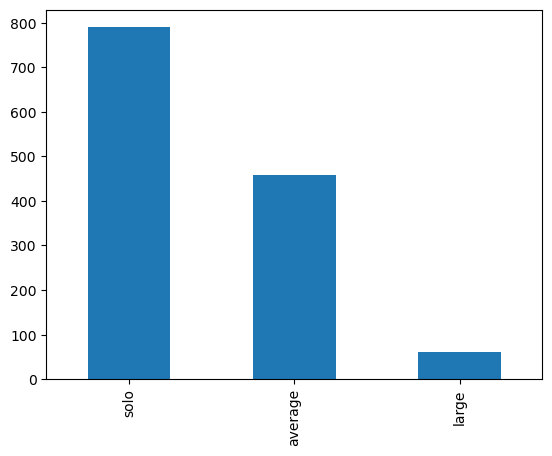

In [39]:
titanic.apply(get_fam_size, axis =1).value_counts().plot(kind = "bar")

In [40]:
titanic["pclass"]

0       1
1       1
2       1
3       1
4       1
       ..
1304    3
1305    3
1306    3
1307    3
1308    3
Name: pclass, Length: 1309, dtype: int64

In [41]:
titanic["pclass"].map({1:'1st', 2:'2nd',3:'3rd'})

0       1st
1       1st
2       1st
3       1st
4       1st
       ... 
1304    3rd
1305    3rd
1306    3rd
1307    3rd
1308    3rd
Name: pclass, Length: 1309, dtype: object